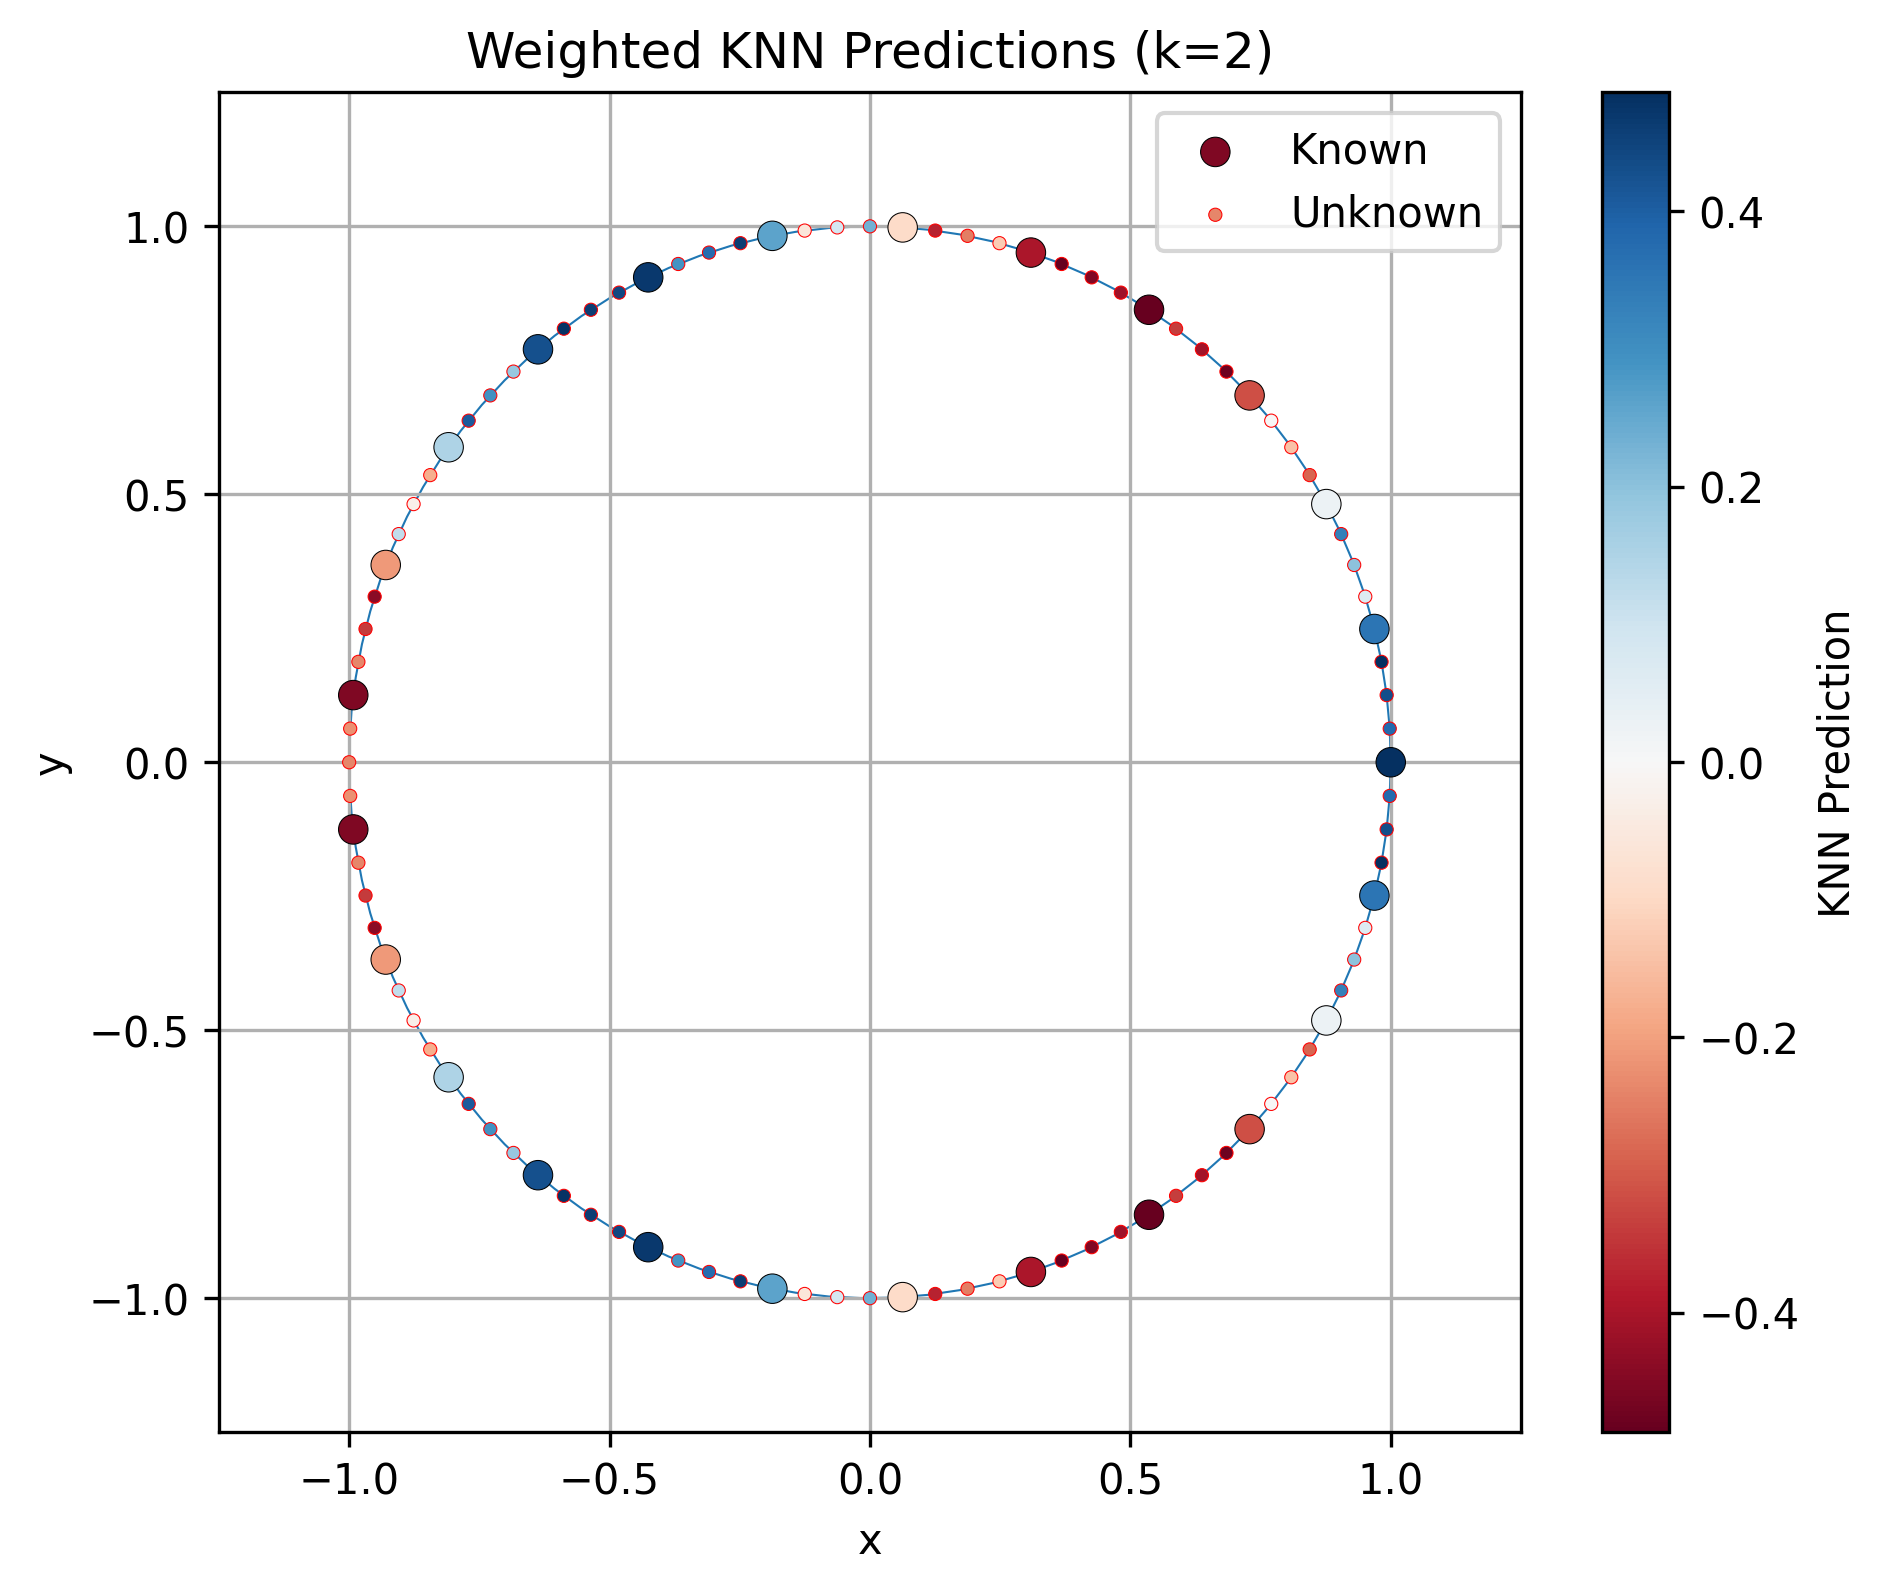

In [7]:
# I wrote my own code for weighted knn regression as the sklearn library
# was not very easy to work with for custom distances and weights

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# function to compute distance between two points
def arc_length(x):
    r = 1
    dist = r*(abs(np.arctan2(x[1], x[0]) - np.arctan2(y_data, x_data)))
    return dist

# function to perform regression for a point
def regress(x, k):
    d = arc_length(x)
    indices = np.argpartition(d, k)[:k]
    
    prox = np.square(d[indices])
    weights = prox/np.sum(prox)  # calculating custom weights
    
    knn = np.sum(np.dot(v_data[indices], weights))/k  # regressing over two closest neighbors
    return knn

# predicting values at unknown points
def predictions(points, k):
    l, b = np.shape(points)
    L = np.zeros(l)
    for i in range(l):
            L[i] = regress(points[i], k)  # predicting the values at each query point
    return L        

# importing data from file
path = ('hw1_bonus.xlsx')
known = pd.read_excel(path, "Known")
unknown = pd.read_excel(path, "Unknown")
x_data = known['x'].values
y_data = known['y'].values
v_data = known['v'].values
x = unknown['x'].values
y = unknown['y'].values
points = np.array([x, y]).T

k = 2
data = predictions(points, k)  # getting output from knn regression

# plotting
plt.figure(figsize = (7, 5.8), dpi = 300)
t = np.linspace(0,np.pi*2,100)
plt.scatter(x_data, y_data, c = v_data, cmap = 'RdBu', s = 50, edgecolors = 'black', linewidth = 0.25, zorder = 5)
plt.scatter(points[:,0], points[:,1], c = data, cmap = 'RdBu', s = 10, edgecolors = 'red', linewidth = 0.25, zorder = 5)
plt.plot(np.cos(t), np.sin(t), linewidth = 0.5, zorder = 0)
plt.colorbar(label='KNN Prediction')
plt.title(f'Weighted KNN Predictions (k={k})')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-1, 1.5, 0.5))
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])
plt.grid(zorder = 0)
plt.legend(["Known", "Unknown"])
plt.show()

# exporting data to file
d_pred = pd.DataFrame(np.c_[x, y, data])
d_pred.columns = ['x', 'y', 'prediction']
d_pred.to_csv("data_export.csv")